<center><img src="BISA.png", width=300, height=150>
<br>
<center><h1>Introduction to Python for Data Science</h1></center>
<center><h2>Activity 2: Intro to Data Visualisation (Solutions)</h2></center>
<center>Materials made by Jeffrey Lo, for the Python Workshop on 12 September, 2018.</center>
<br>

In this section, we will introduce Pandas (which builds on top of NumPy) and Seaborn (which builds on top of Matplotlib). We will use a practical approach by using a real dataset that I found on Kaggle (a data science competition platform).


## Bike Sharing Dataset

https://www.kaggle.com/marklvl/bike-sharing-dataset/home

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information.

## Importing Modules/Packages

Recall from activity 1 that we need to import our extra modules and packages first.

We will use NumPy, Pandas, Matplotlib and Seaborn. The last line is a technicality, telling Python to show the graphs in-line.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Pandas

We will start by using some of the functionalities of Pandas. You can think of Pandas as one that gives some functionalities of Excel.

### Importing data

`pd.read_csv` will read the CSV file and store the dataset in the variable we named `data`. The file has to be in the same directory (folder) as this notebook, otherwise you can use subdirectories and so on.

N.b If it's an Excel file, you can use `pd.read_excel`.

In [2]:
data = pd.read_csv("bike_sharing_data_by_day.csv")

### Getting to know your dataset

Below, it is clear that Pandas dataframe resembles Excel worksheet, except you cannot edit them (you would need to do this via coding).

We call `.head()` to show the first 5 rows. You can specify the number of rows to display by inputting a parameter e.g. `.head(12)`.

In [3]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Similarly, `.tail()` will show the last 5 rows.

In [4]:
data.tail(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


`data.shape` outputs the number of rows and columns, respectively.

N.b. in machine learning, rows are called instances and columns are called features.

In [5]:
data.shape #number of rows, columns

(731, 16)

### Features

According to the documentation, we can find what these features mean.

	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- holiday : weather day is holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Data aesthetics

We can drop and rename columns, using the `drop` and `.rename` functions.

In [6]:
data = data.drop('instant', axis=1)
data.rename(columns={'dteday':'date',
                     'weathersit':'weather',
                     'hum':'humidity',
                     'mnth':'month',
                     'cnt':'total_count',
                     'yr':'year'},inplace=True)
data['year'] = data['year'] + 2011 # documentation says 0 = 2011

In [7]:
data.head(1) #check that they have been correctly renamed and dropped

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


### Descriptive Statistics

In [8]:
data.describe().round(1)

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0
mean,2.5,2011.5,6.5,0.0,3.0,0.7,1.4,0.5,0.5,0.6,0.2,848.2,3656.2,4504.3
std,1.1,0.5,3.5,0.2,2.0,0.5,0.5,0.2,0.2,0.1,0.1,686.6,1560.3,1937.2
min,1.0,2011.0,1.0,0.0,0.0,0.0,1.0,0.1,0.1,0.0,0.0,2.0,20.0,22.0
25%,2.0,2011.0,4.0,0.0,1.0,0.0,1.0,0.3,0.3,0.5,0.1,315.5,2497.0,3152.0
50%,3.0,2012.0,7.0,0.0,3.0,1.0,1.0,0.5,0.5,0.6,0.2,713.0,3662.0,4548.0
75%,3.0,2012.0,10.0,0.0,5.0,1.0,2.0,0.7,0.6,0.7,0.2,1096.0,4776.5,5956.0
max,4.0,2012.0,12.0,1.0,6.0,1.0,3.0,0.9,0.8,1.0,0.5,3410.0,6946.0,8714.0


## Seaborn

We already imported Seaborn earlier, so we don't have to do that here again.

With most statistical analysis, oftentimes we start it off by visualising the distribution of the response variable (in this case `total_count`, or daily count of bike riders). The below plot agrees with the descriptive statistics of `total_count` (above) - the minimum is ~0, mean is ~4500, max is around ~8000+.

In [9]:
#The below are just for setting my preferred aesthetics and styling.
sns.set_style('white')
sns.set_context('notebook')

### Distribution

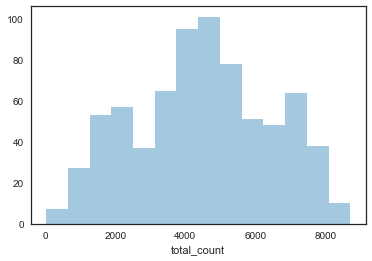

In [10]:
sns.distplot(data['total_count'], kde=None)
plt.show()

---

**Exercise 1**: in the cell below, show the distribution of casual riders over 2011-12! (Hint: copy the above code and modify)

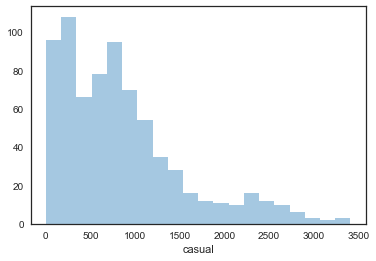

In [11]:
sns.distplot(data['casual'], kde=None)
plt.show()

___

### Daily Bike Shares over 2011-12

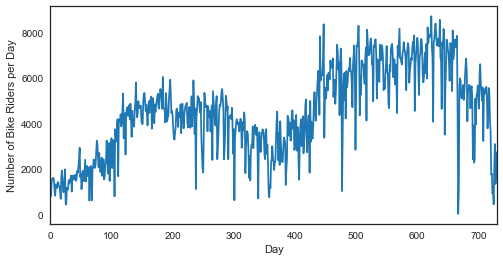

In [12]:
#this is actually not using seaborn
fig = plt.figure(figsize=(8,4))
data['total_count'].plot()
plt.xlabel("Day")
plt.ylabel("Number of Bike Riders per Day")
plt.show()

### Average Daily Bike Shares (by Month)

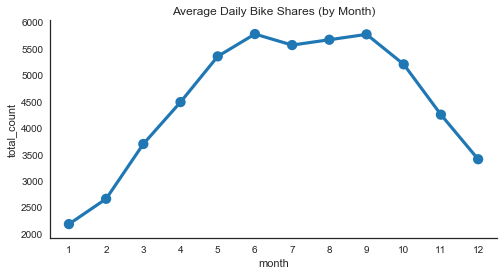

In [13]:
fig = plt.figure(figsize=(8,4))
sns.pointplot(data=data, x='month', y='total_count', ci=None) #confidence interval turned off
sns.despine()
plt.title("Average Daily Bike Shares (by Month)") #from matplotlib
plt.show()

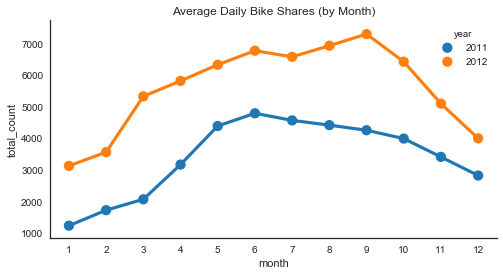

In [14]:
fig = plt.figure(figsize=(8,4))
sns.pointplot(data=data, x='month', y='total_count', hue='year', ci=None)
sns.despine()
plt.title("Average Daily Bike Shares (by Month)")
plt.show()

---

**Exercise 2**: You want to find out whether or not bike shares are higher when there is clear weather - use a graph to show this. (Hint: copy the code above and paste in the cell below, and change the hue!)

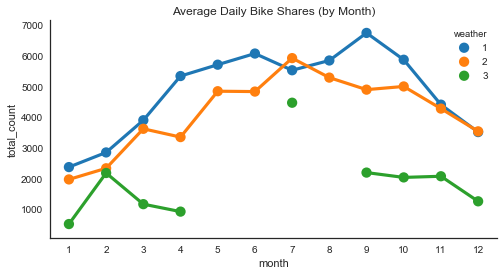

In [15]:
fig = plt.figure(figsize=(8,4))
sns.pointplot(data=data, x='month', y='total_count', hue='weather', ci=None)
sns.despine()
plt.title("Average Daily Bike Shares (by Month)")
plt.show()

---

### Distribution of Daily Bike Shares (by Weekday)

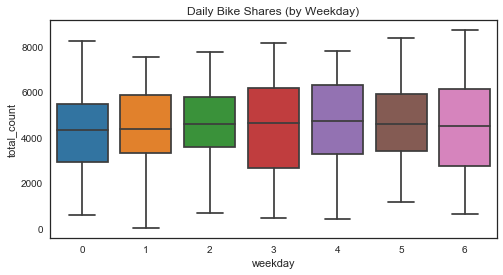

In [16]:
fig = plt.figure(figsize=(8,4))
sns.boxplot(data=data, x='weekday', y='total_count')
plt.title("Daily Bike Shares (by Weekday)")
plt.show()

### Distribution of Daily Bike Shares (by Weather)

Recall:

    weather: 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

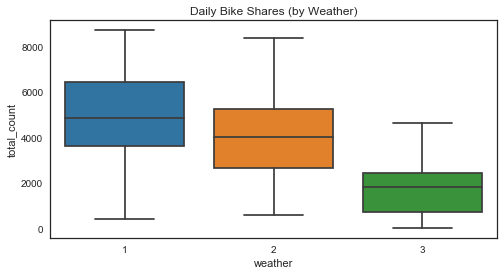

In [17]:
fig = plt.figure(figsize=(8,4))
sns.boxplot(data=data, x='weather', y='total_count')
plt.title("Daily Bike Shares (by Weather)")
plt.show()

Using a "swarmplot" may show extra information compared to the boxplot. One advantage is that you can see how many instances each weather type occur!

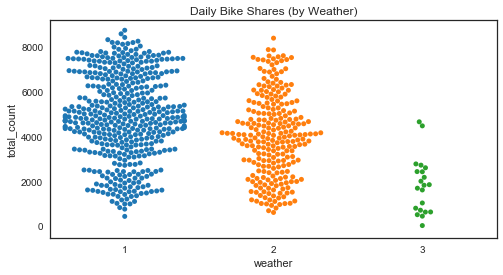

In [18]:
fig = plt.figure(figsize=(8,4))
sns.swarmplot(data=data, x='weather', y='total_count')
plt.title("Daily Bike Shares (by Weather)")
plt.show()

---

**Exercise 3**: Use and edit the code above such that colours are showing variants of blues, instead of the current "Blue, Yellow and Green" variation. (Hint: from [swarmplot documentation](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) it says that `palette` parameter can be used and mapped from [sequential colour palettes](https://seaborn.pydata.org/tutorial/color_palettes.html).)

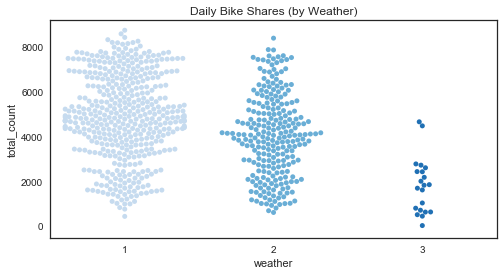

In [19]:
fig = plt.figure(figsize=(8,4))
sns.swarmplot(data=data, x='weather', y='total_count', palette='Blues')
plt.title("Daily Bike Shares (by Weather)")
plt.show()

---

### Temperature and Daily Bike Shares

Text(0.5,1,'Temperature vs Daily Bike Shares (2011-12)')

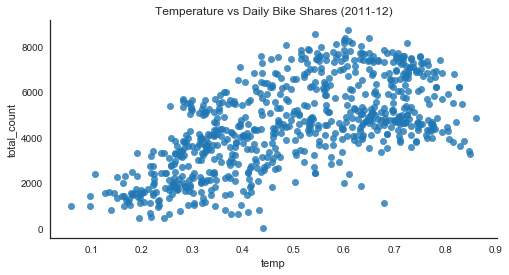

In [20]:
fig = plt.figure(figsize=(8,4))
sns.regplot(data=data, x='temp', y='total_count', fit_reg=False)
sns.despine()
plt.title("Temperature vs Daily Bike Shares (2011-12)")

---

**Exercise 4**: Is there a relationship between windspeed and the number of bike shares that day? Fit a line of best fit (linear regression line) in the graph as well. (Hint: use and edit two parameters in the above code.)

Text(0.5,1,'Temperature vs Daily Bike Shares (2011-12)')

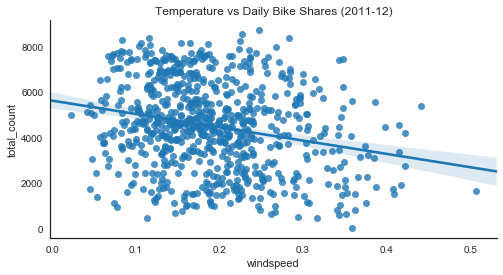

In [21]:
fig = plt.figure(figsize=(8,4))
sns.regplot(data=data, x='windspeed', y='total_count', fit_reg=True)
sns.despine()
plt.title("Temperature vs Daily Bike Shares (2011-12)")

___

## Appendix 1: More Seaborn Graphs!

From the previous example, we can plot a LOWESS (locally weighted scatterplot smoothing) curve which tries to fit a smooth line through a scatterplot. This makes more sense than the straight line according to the dataset - the average number of bike riders start to flatten when the normalised temperature is above 0.6.

Text(0.5,1,'Temperature vs Daily Bike Shares (2011-12)')

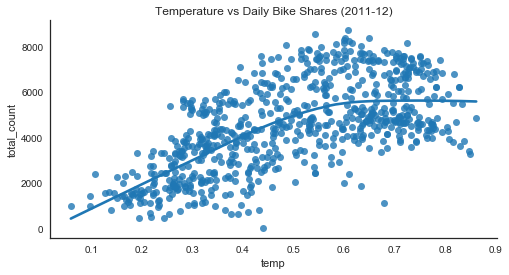

In [22]:
fig = plt.figure(figsize=(8,4))
sns.regplot(data=data, x='temp', y='total_count', lowess=True)
sns.despine()
plt.title("Temperature vs Daily Bike Shares (2011-12)")

We can show plot the time series of casual and registered bike shares across 2011-12:

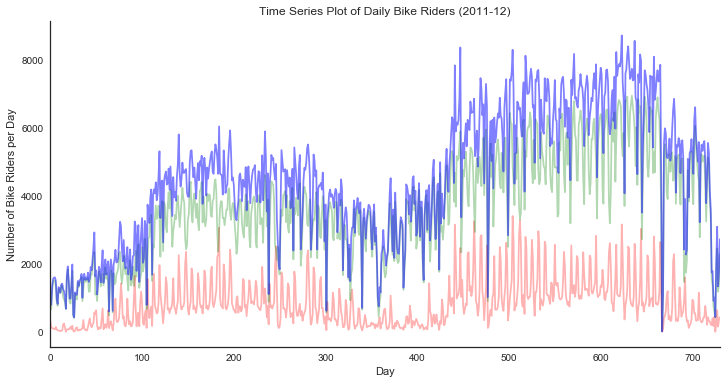

In [23]:
fig = plt.figure(figsize=(12,6))
data['casual'].plot(color="red", alpha=0.3)
data['registered'].plot(color="green", alpha=0.3)
data['total_count'].plot(color="blue", alpha=0.5)
sns.despine()
plt.title("Time Series Plot of Daily Bike Riders (2011-12)")
plt.xlabel("Day")
plt.ylabel("Number of Bike Riders per Day")
plt.show()

C:\Program Files\Anaconda3-5.0.1x64\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=35,min_periods=0,adjust=True,ignore_na=False).mean()
  after removing the cwd from sys.path.
C:\Program Files\Anaconda3-5.0.1x64\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=35,min_periods=0,adjust=True,ignore_na=False).mean()
  """
C:\Program Files\Anaconda3-5.0.1x64\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=35,min_periods=0,adjust=True,ignore_na=False).mean()
  


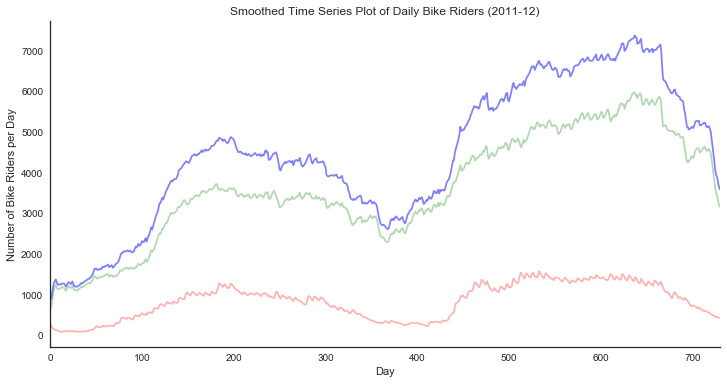

In [24]:
from pandas.stats.moments import ewma

fig = plt.figure(figsize=(12,6))
ewma(data['casual'], span=35).plot(style='r', alpha=0.3)
ewma(data['registered'], span=35).plot(style='g', alpha=0.3)
ewma(data['total_count'], span=35).plot(style='b', alpha=0.5)
sns.despine()
plt.title("Smoothed Time Series Plot of Daily Bike Riders (2011-12)")
plt.xlabel("Day")
plt.ylabel("Number of Bike Riders per Day")
plt.show()

Here is a violin plot!

Question - what is this plot actually showing?

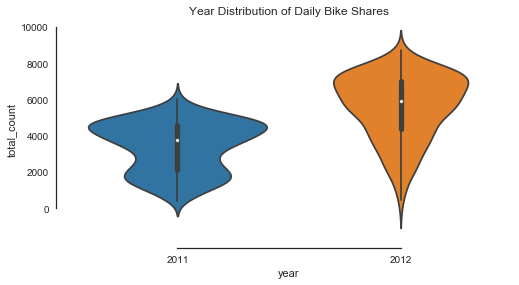

In [25]:
fig = plt.figure(figsize=(8,4))
sns.violinplot(data=data, x='year', y='total_count')
sns.despine(offset=10, trim=True)
plt.title("Year Distribution of Daily Bike Shares")
plt.show()

## Appendix 2: Piecharts and Matplotlib

Seaborn does not support piecharts, so we turn back to Matplotlib.

To find the ratio of casual users and registered users, we first sum up the number of casual and registered users and store those two numbers in a list.

In [26]:
member_type = list([sum(data['casual']),sum(data['registered'])])
member_type

[620017, 2672662]

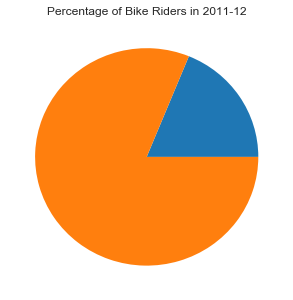

In [27]:
plt.figure(figsize=(5,5))
plt.pie(member_type)
plt.title("Percentage of Bike Riders in 2011-12")
plt.show()

Some more customisations and it can look nicer and cleaner!

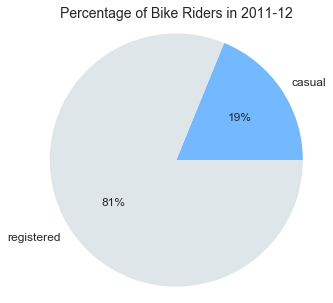

In [28]:
labels = 'casual', 'registered'
colors = ["#74b9ff", "#dfe6e9"]
plt.figure(figsize=(5,5))
patches, texts, autotexts = plt.pie(member_type, labels=labels, colors=colors, autopct='%1.0f%%')
plt.title("Percentage of Bike Riders in 2011-12", fontsize=14); plt.axis('equal')
for t in texts:
    t.set_fontsize(12)
for t in autotexts:
    t.set_fontsize(12)
plt.show()